In [78]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
data = pd.read_csv('dataset house/Cleaned train.csv')

In [63]:
data.columns


Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Saleprice'],
      dtype='object', length=380)

In [64]:
id = data['Id']
data


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.000000,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.000000,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.000000,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.000000,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.000000,...,0,0,1,0,0,0,0,1,0,250001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,17.611139,13.688829,6,3.991517,1999,2000,54.598150,665.141633,0.000000,...,0,0,1,0,0,0,0,1,0,175001.0
1454,1455,21.472480,14.838658,6,4.679501,1978,1988,15.342608,156.123103,8.046409,...,0,0,1,0,0,0,0,1,0,210001.0
1455,1456,18.320139,13.983828,7,6.637669,1941,2006,54.598150,73.494065,0.000000,...,0,0,1,0,0,0,0,1,0,266501.0
1456,1457,18.668047,14.145129,5,4.679501,1950,1996,54.598150,21.007316,13.087759,...,0,0,1,0,0,0,0,1,0,142126.0


In [65]:
corr_matrix = data.corr()
corr_matrix

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
Id,1.000000,-0.014805,-0.021195,-0.030220,0.013102,-0.013483,-0.022730,0.011561,0.022248,-0.004884,...,-0.021121,0.039001,0.027769,0.007185,-0.034831,-0.008982,0.004932,0.017203,-0.022846,-0.021684
LotFrontage,-0.014805,1.000000,0.624252,0.216583,-0.031857,0.107515,0.070646,-0.088648,-0.033503,0.058612,...,0.098001,-0.023509,-0.070533,-0.018783,-0.038467,-0.015795,0.011719,-0.052344,0.096722,0.365421
LotArea,-0.021195,0.624252,1.000000,0.167671,-0.004723,0.018634,0.023408,-0.006947,-0.010857,0.091655,...,0.041298,0.000444,-0.022727,-0.040199,-0.014645,0.017464,-0.004380,-0.006966,0.045232,0.394893
OverallQual,-0.030220,0.216583,0.167671,1.000000,-0.084761,0.571368,0.549827,-0.319383,0.025498,-0.097047,...,0.318733,-0.058105,-0.217261,-0.103049,-0.041703,-0.044844,-0.025197,-0.136177,0.314670,0.795774
OverallCond,0.013102,-0.031857,-0.004723,-0.084761,1.000000,-0.366901,0.076631,0.143070,-0.067787,0.073359,...,-0.153025,-0.052087,0.161617,-0.048032,-0.039910,-0.033999,-0.023713,0.160406,-0.148554,-0.073988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,-0.008982,-0.015795,0.017464,-0.044844,-0.033999,-0.009964,-0.020605,0.031711,0.027306,-0.031964,...,-0.027282,-0.004137,0.035370,-0.024853,-0.004778,1.000000,-0.010743,-0.195546,-0.027651,-0.015539
SaleCondition_Family,0.004932,0.011719,-0.004380,-0.025197,-0.023713,-0.035626,-0.047917,-0.016926,0.052913,-0.005622,...,-0.035318,-0.005355,0.028313,-0.032174,-0.006186,-0.010743,1.000000,-0.253150,-0.035797,-0.046499
SaleCondition_Normal,0.017203,-0.052344,-0.006966,-0.136177,0.160406,-0.155549,-0.117760,0.059808,-0.123659,0.057189,...,-0.642842,-0.097470,0.631632,-0.585615,-0.112587,-0.195546,-0.253150,1.000000,-0.651559,-0.154795
SaleCondition_Partial,-0.022846,0.096722,0.045232,0.314670,-0.148554,0.341360,0.320442,-0.118467,0.130927,-0.100197,...,0.986622,-0.013783,-0.767150,-0.082810,-0.015921,-0.027651,-0.035797,-0.651559,1.000000,0.355162


In [66]:
correlations = corr_matrix['Saleprice'].abs().sort_values(ascending=False)
correlations

Saleprice           1.000000
OverallQual         0.795774
GrLivArea           0.704396
GrLivArea_log_sq    0.700748
GrLivArea_log       0.697598
                      ...   
BsmtFinType2_GLQ    0.000061
has2ndfloor              NaN
hasgarage                NaN
hasbsmt                  NaN
MSSubClass_150           NaN
Name: Saleprice, Length: 380, dtype: float64

In [67]:
#filtering data
correlation_threshold = 0.2
columns_to_remove = correlations[correlations < correlation_threshold].index
columns_to_remove


Index(['MasVnrType_BrkFace', 'Electrical_FuseA', 'Neighborhood_OldTown',
       'Neighborhood_NAmes', 'BsmtUnfSF_log', 'HasEnclosedPorch',
       'Neighborhood_Edwards', 'EnclosedPorch_log', 'Fence_None',
       'GarageFinish_RFn',
       ...
       'Condition1_RRNe', 'MoSold_10', 'LotConfig_Corner', 'BldgType_TwnhsE',
       'Condition2_RRAe', 'Foundation_Wood', 'GarageCond_Gd',
       'RoofStyle_Mansard', 'RoofMatl_Metal', 'BsmtFinType2_GLQ'],
      dtype='object', length=263)

In [68]:
#for i in columns_to_remove:
#    if i == 'Id':
#        print('yes')
#        break
data_reduced = data.drop(columns=columns_to_remove)
data_reduced

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial,Saleprice
0,18.144573,13.833054,7,2003,2003,19.433175,29.991055,422.488510,5.939034,1025.651979,...,0,1,0,1,0,1,0,1,0,208501.0
1,20.673625,14.117918,6,1976,1976,54.598150,44.135415,593.888179,6.234990,665.141633,...,0,1,0,1,0,1,0,1,0,181501.0
2,18.668047,14.476512,7,2001,2002,17.768840,56.896536,450.079716,5.994336,1040.521060,...,0,1,0,1,0,1,0,1,0,223501.0
3,17.249651,14.106196,7,1915,1970,54.598150,64.808858,378.854568,6.027704,904.477422,...,0,1,0,1,0,1,0,1,0,140001.0
4,21.314283,15.022008,8,2000,2000,25.404164,61.166379,545.309927,6.161221,1273.024863,...,0,1,0,1,0,1,0,1,0,250001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,17.611139,13.688829,6,1999,2000,54.598150,90.759786,464.212769,6.021310,828.069020,...,0,1,0,1,0,1,0,1,0,175001.0
1454,21.472480,14.838658,6,1978,1988,15.342608,68.243788,707.987031,6.607056,665.141633,...,0,1,0,1,0,1,0,1,0,210001.0
1455,18.320139,13.983828,7,1941,2006,54.598150,86.407866,548.233040,6.189206,1396.662961,...,0,1,0,1,0,1,0,1,0,266501.0
1456,18.668047,14.145129,5,1950,1996,54.598150,0.000000,517.217311,6.115366,665.141633,...,0,1,0,1,0,1,0,1,0,142126.0


In [69]:
new_data = pd.concat([id,data_reduced], axis=1)
new_data

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,2003,2003,19.433175,29.991055,422.488510,5.939034,...,0,1,0,1,0,1,0,1,0,208501.0
1,2,20.673625,14.117918,6,1976,1976,54.598150,44.135415,593.888179,6.234990,...,0,1,0,1,0,1,0,1,0,181501.0
2,3,18.668047,14.476512,7,2001,2002,17.768840,56.896536,450.079716,5.994336,...,0,1,0,1,0,1,0,1,0,223501.0
3,4,17.249651,14.106196,7,1915,1970,54.598150,64.808858,378.854568,6.027704,...,0,1,0,1,0,1,0,1,0,140001.0
4,5,21.314283,15.022008,8,2000,2000,25.404164,61.166379,545.309927,6.161221,...,0,1,0,1,0,1,0,1,0,250001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,17.611139,13.688829,6,1999,2000,54.598150,90.759786,464.212769,6.021310,...,0,1,0,1,0,1,0,1,0,175001.0
1454,1455,21.472480,14.838658,6,1978,1988,15.342608,68.243788,707.987031,6.607056,...,0,1,0,1,0,1,0,1,0,210001.0
1455,1456,18.320139,13.983828,7,1941,2006,54.598150,86.407866,548.233040,6.189206,...,0,1,0,1,0,1,0,1,0,266501.0
1456,1457,18.668047,14.145129,5,1950,1996,54.598150,0.000000,517.217311,6.115366,...,0,1,0,1,0,1,0,1,0,142126.0


In [70]:
x_train = new_data.drop('Saleprice',axis=1)
x_train

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial
0,1,18.144573,13.833054,7,2003,2003,19.433175,29.991055,422.488510,5.939034,...,0,0,1,0,1,0,1,0,1,0
1,2,20.673625,14.117918,6,1976,1976,54.598150,44.135415,593.888179,6.234990,...,0,0,1,0,1,0,1,0,1,0
2,3,18.668047,14.476512,7,2001,2002,17.768840,56.896536,450.079716,5.994336,...,0,0,1,0,1,0,1,0,1,0
3,4,17.249651,14.106196,7,1915,1970,54.598150,64.808858,378.854568,6.027704,...,1,0,1,0,1,0,1,0,1,0
4,5,21.314283,15.022008,8,2000,2000,25.404164,61.166379,545.309927,6.161221,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,17.611139,13.688829,6,1999,2000,54.598150,90.759786,464.212769,6.021310,...,0,0,1,0,1,0,1,0,1,0
1454,1455,21.472480,14.838658,6,1978,1988,15.342608,68.243788,707.987031,6.607056,...,1,0,1,0,1,0,1,0,1,0
1455,1456,18.320139,13.983828,7,1941,2006,54.598150,86.407866,548.233040,6.189206,...,0,0,1,0,1,0,1,0,1,0
1456,1457,18.668047,14.145129,5,1950,1996,54.598150,0.000000,517.217311,6.115366,...,1,0,1,0,1,0,1,0,1,0


In [71]:
y_train = new_data['Saleprice']
y_train

0       208501.0
1       181501.0
2       223501.0
3       140001.0
4       250001.0
          ...   
1453    175001.0
1454    210001.0
1455    266501.0
1456    142126.0
1457    147501.0
Name: Saleprice, Length: 1458, dtype: float64

In [72]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred = lr_model.predict(x_train)


In [74]:
r2 = r2_score(y_train, y_pred)

print('R-squared Score (R2):', r2)

R-squared Score (R2): 0.9268350855917276


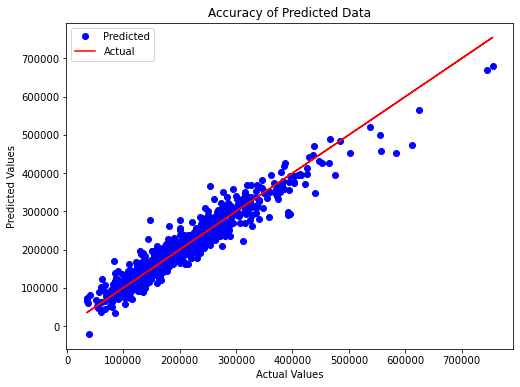

In [87]:
#accuracy of the predicted data
y_trained = np.array(y_train)
y_predicted = np.array(y_pred)

plt.figure(figsize=(8, 6))
plt.plot(y_train, y_predicted, 'o', color='blue', label='Predicted')
plt.plot(y_train, y_trained, '-', color='red', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Accuracy of Predicted Data')
plt.legend()
plt.show()

In [88]:

test_data = pd.read_csv('dataset house/Cleaned test.csv')
test_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20.673625,14.550687,5,4.679501,1961,1961,54.598150,107.505912,7.760721,...,0,0,0,1,0,0,0,0,1,0
1,1462,20.834996,15.023149,6,4.679501,1958,1958,14.642918,174.393644,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,1463,19.687482,14.950918,5,3.991517,1997,1998,54.598150,156.263694,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,1464,20.348384,14.204772,6,4.679501,1998,1998,6.157403,128.653472,0.000000,...,0,0,0,1,0,0,0,0,1,0
4,1465,13.949261,12.696875,8,3.991517,1992,1992,54.598150,71.179547,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,8.726308,10.765922,4,5.348041,1970,1970,54.598150,665.141633,0.000000,...,0,0,0,1,0,0,0,0,1,0
1455,2916,8.726308,10.723223,4,3.991517,1970,1970,54.598150,69.030589,0.000000,...,0,0,0,1,1,0,0,0,0,0
1456,2917,31.755371,15.820339,5,5.348041,1960,1996,54.598150,213.123315,0.000000,...,0,0,0,1,1,0,0,0,0,0
1457,2918,17.611139,14.307159,5,3.991517,1992,1992,54.598150,85.016479,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [89]:
new_columns = set(new_data.columns)
# Filtering data
filtered_data = test_data[[col for col in test_data.columns if col in new_columns]]
filtered_data

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageFinish_Unf,GarageQual_None,GarageQual_TA,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Partial
0,1461,20.673625,14.550687,5,1961,1961,54.598150,42.813715,433.727206,5.974079,...,1,0,1,0,1,0,1,0,1,0
1,1462,20.834996,15.023149,6,1958,1958,14.642918,54.675311,621.452838,6.274101,...,1,0,1,0,1,0,1,0,1,0
2,1463,19.687482,14.950918,5,1997,1998,54.598150,28.375987,453.511592,6.000966,...,0,0,1,0,1,0,1,0,1,0
3,1464,20.348384,14.204772,6,1998,1998,6.157403,47.769042,452.653967,5.999314,...,0,0,1,0,1,0,1,0,1,0
4,1465,13.949261,12.696875,8,1992,1992,54.598150,94.312871,601.311031,6.245705,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,8.726308,10.765922,4,1970,1970,54.598150,65.236276,284.720532,5.590761,...,0,1,0,1,0,0,1,0,1,0
1455,2916,8.726308,10.723223,4,1970,1970,54.598150,45.062871,284.720532,5.590761,...,1,0,1,0,1,0,1,0,1,0
1456,2917,31.755371,15.820339,5,1960,1996,54.598150,0.000000,578.174364,6.211838,...,1,0,1,0,1,0,1,0,1,0
1457,2918,17.611139,14.307159,5,1992,1992,54.598150,67.275011,446.644145,6.034831,...,0,1,0,1,0,0,1,0,1,0


In [90]:
#prediciting on test-data
test_pred = lr_model.predict(filtered_data)
test_pred

array([134028.45087624, 161919.85985708, 186261.28347158, ...,
       173443.11700106, 121917.15880346, 219502.47466755])